In [2]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [7]:
conn=pymysql.connect(host='localhost',port=3306,user='root',password='1111',db='wecs')
sql24="select * from 24canTBL"

In [9]:
df1 = pd.read_sql_query(sql24,conn)
df1

C:\Users\user\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,24can,sex,2015_pop,2015_fre,2015_inc,2015_age,2016_pop,2016_fre,2016_inc,2016_age,...,2017_inc,2017_age,2018_pop,2018_fre,2018_inc,2018_age,2019_pop,2019_fre,2019_inc,2019_age
0,모든 암(C00-C96),계,218204,100.0,428.3,280.4,232621,100.0,455.1,291.2,...,461.0,287.7,245874,100.0,479.3,292.4,254718,100.0,496.2,295.8
1,모든 암(C00-C96),남자,115103,100.0,452.1,306.0,121866,100.0,477.4,312.3,...,486.2,306.7,129824,100.0,507.1,308.7,134180,100.0,523.9,308.1
2,모든 암(C00-C96),여자,103101,100.0,404.4,270.8,110755,100.0,432.9,285.6,...,436.0,283.6,116050,100.0,451.6,290.8,120538,100.0,468.5,297.4
3,"입술, 구강 및 인두(C00-C14)",계,3367,1.5,6.6,4.4,3607,1.6,7.1,4.6,...,7.3,4.6,3843,1.6,7.5,4.6,3969,1.6,7.7,4.6
4,"입술, 구강 및 인두(C00-C14)",남자,2432,2.1,9.6,6.5,2569,2.1,10.1,6.8,...,10.5,6.8,2766,2.1,10.8,6.7,2863,2.1,11.2,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,백혈병(C91-C95),남자,1857,1.6,7.3,6.2,1999,1.6,7.8,6.5,...,7.6,6.2,2055,1.6,8.0,6.4,2108,1.6,8.2,6.5
71,백혈병(C91-C95),여자,1429,1.4,5.6,4.4,1438,1.3,5.6,4.5,...,5.7,4.2,1465,1.3,5.7,4.3,1630,1.4,6.3,4.6
72,기타 암(Re. C00-C96),계,16821,7.7,33.0,21.1,18528,8.0,36.2,22.4,...,36.8,22.0,20311,8.3,39.6,23.0,20735,8.1,40.4,22.7
73,기타 암(Re. C00-C96),남자,8522,7.4,33.5,23.8,9295,7.6,36.4,25.0,...,37.0,24.6,10272,7.9,40.1,25.7,10423,7.8,40.7,25.1


In [10]:
# 발생자수 값만 추출
df1 = df1.iloc[1:, [0,1,2,6,10,14,18]]

# 전체 성별 값만 추출
df1 = df1[df1['sex'] == '계']

# 성별 열 제거
df1.drop('sex', axis = 1, inplace = True)

# 인덱스 변경
df1.set_index('24can', inplace = True)

# 인덱스 코드 제거
df_index_list = []
for i in range(len(df1.index)):
    a = df1.index[i].split('(')[0]
    df_index_list.append(a)
    
df1.index = df_index_list
df1

,2015_pop,2016_pop,2017_pop,2018_pop,2019_pop
"입술, 구강 및 인두",3367,3607,3743,3843,3969
식도,2456,2531,2527,2708,2870
위,29449,30766,30082,29408,29493
대장,27248,28533,28596,28186,29030
간,15971,15964,15670,15834,15605
담낭 및 기타 담도,6319,6761,6919,7235,7383
췌장,6411,6757,7136,7674,8099
후두,1162,1188,1238,1153,1222
폐,24724,26250,27464,28891,29960
유방,19406,21989,22641,23723,24933


In [11]:
df1 = df1.apply(pd.to_numeric)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 입술, 구강 및 인두 to 기타 암
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   2015_pop  24 non-null     int64
 1   2016_pop  24 non-null     int64
 2   2017_pop  24 non-null     int64
 3   2018_pop  24 non-null     int64
 4   2019_pop  24 non-null     int64
dtypes: int64(5)
memory usage: 1.1+ KB


In [12]:
df1.sort_values(by='2019_pop', ascending = False, inplace = True)
# df1.drop('기타 암', axis = 0, inplace = True)
df1

,2015_pop,2016_pop,2017_pop,2018_pop,2019_pop
갑상선,25523,26599,26751,28961,30676
폐,24724,26250,27464,28891,29960
위,29449,30766,30082,29408,29493
대장,27248,28533,28596,28186,29030
유방,19406,21989,22641,23723,24933
기타 암,16821,18528,18841,20311,20735
전립선,10389,12002,13029,14983,16803
간,15971,15964,15670,15834,15605
췌장,6411,6757,7136,7674,8099
담낭 및 기타 담도,6319,6761,6919,7235,7383


In [13]:
# 라인 점 그래프 그리기
df_cancer_top5 = df1.iloc[0:5,:].T
df_cancer_top5

,갑상선,폐,위,대장,유방
2015_pop,25523,24724,29449,27248,19406
2016_pop,26599,26250,30766,28533,21989
2017_pop,26751,27464,30082,28596,22641
2018_pop,28961,28891,29408,28186,23723
2019_pop,30676,29960,29493,29030,24933


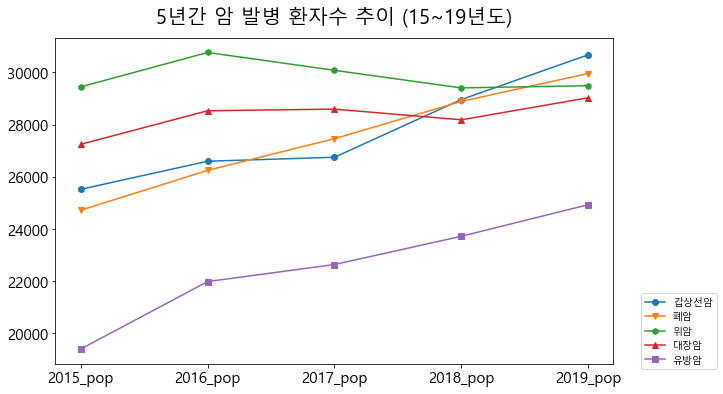

In [14]:
# 그래프
plt.figure(figsize = (10,6))
plt.plot(df_cancer_top5['갑상선'], marker = 'o', label = '갑상선암')
plt.plot(df_cancer_top5['폐'], marker = 'v', label = '폐암')
plt.plot(df_cancer_top5['위'], marker = 'h', label = '위암')
plt.plot(df_cancer_top5['대장'], marker = '^', label = '대장암')
plt.plot(df_cancer_top5['유방'], marker = 's', label = '유방암')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('5년간 암 발병 환자수 추이 (15~19년도)', fontsize = 20, pad = 15)
plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.1))
plt.show()

In [15]:
sqldeath = "select * from deathTBL"
df2 = pd.read_sql_query(sqldeath,conn)
df2

C:\Users\user\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,death_reason,sex,region,_2018,_2019,_2020
0,계,계,전국,298820,295110,304948
1,계,계,서울특별시,45219,43829,45522
2,계,계,부산광역시,22570,22260,22950
3,계,계,대구광역시,14070,13752,14460
4,계,계,인천광역시,15316,15131,15689
...,...,...,...,...,...,...
1075,질병이환 및 사망의 외인 (V01-Y89),여자,전라북도,401,377,312
1076,질병이환 및 사망의 외인 (V01-Y89),여자,전라남도,456,392,457
1077,질병이환 및 사망의 외인 (V01-Y89),여자,경상북도,583,577,602
1078,질병이환 및 사망의 외인 (V01-Y89),여자,경상남도,700,575,551


In [16]:
df2['death_reason'].unique()

array(['계', '특정 감염성 및 기생충성 질환 (A00-B99, U07.1, U07.2)', '신생물 (C00-D48)',
       '혈액 및 조혈기관질환과 면역메커니즘을 침범하는 특정장애 (D50-D89) (명)',
       '내분비, 영양 및 대사 질환 (E00-E88)', '정신 및 행동장애 (F01-F99)',
       '신경계통의 질환 (G00-G98)', '눈 및 눈부속기의 질환 (H00-H57)',
       '귀 및 유돌의 질환 (H60-H93)', '순환계통 질환 (I00-I99)',
       '호흡계통의 질환 (J00-J98,U04)', '소화계통의 질환 (K00-K92)',
       '피부 및 피하조직의 질환 (L00-L98)', '근골격계통 및 결합 조직의 질환 (M00-M99)',
       '비뇨생식계통의 질환 (N00-N98)', '임신, 출산 및 산후기 (O00-O99)',
       '출생전후기에 기원한 특정병태 (P00-P96)', '선천 기형, 변형 및 염색체 이상 (Q00-Q99)',
       '달리 분류되지 않은 증상, 징후 (R00-R99)', '질병이환 및 사망의 외인 (V01-Y89)'],
      dtype=object)

In [18]:
# 신생물=암에의한 사망에 해당하는 데이터 추출
df_dead = df2[(df2['death_reason'] == '신생물 (C00-D48)')
             & (df2['sex'] == '계')]

# 시도별과 2020년도에 해당하는 값만 추출
df_dead = df_dead[['region', '_2020']]
df_dead

,region,_2020
108,전국,83776
109,서울특별시,13791
110,부산광역시,6722
111,대구광역시,3984
112,인천광역시,4475
113,광주광역시,2080
114,대전광역시,2056
115,울산광역시,1524
116,세종특별자치시,344
117,경기도,17528


In [19]:
df_dead.iloc[11,0] = '충북'
df_dead.iloc[12,0] = '충남'
df_dead.iloc[13,0] = '전북'
df_dead.iloc[14,0] = '전남'
df_dead.iloc[15,0] = '경북'
df_dead.iloc[16,0] = '경남'

for i in range(len(df_dead.index)):
    a = df_dead.iloc[i,0][:2]
    df_dead.iloc[i,0] = a
    
df_dead.reset_index(inplace = True)
df_dead.drop('index', axis = 1, inplace = True)
df_dead.columns = ['시군구', '암 사망자수']
df_dead

,시군구,암 사망자수
0,전국,83776
1,서울,13791
2,부산,6722
3,대구,3984
4,인천,4475
5,광주,2080
6,대전,2056
7,울산,1524
8,세종,344
9,경기,17528


In [20]:
sqlpropop = "select * from propopTBL"
df3 = pd.read_sql_query(sqlpropop,conn)
df3

C:\Users\user\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,region,_0001,_0002,_0003,_0004,_0005,_0006,_0007,_0008,_0009,...,_0018,_0019,_0020,_0021,_0022,_0023,_0024,_0025,_0026,_0027
0,강원,2183,426,40,97,185,168,94,33,39,...,11,16,24,2,56,4,139,73,12,6
1,경기,19000,3566,389,798,1233,1540,616,204,239,...,60,182,192,16,523,40,1508,463,103,33
2,경남,4753,945,131,244,358,358,188,70,52,...,11,46,41,1,122,6,312,100,62,12
3,경북,3181,543,77,172,283,247,123,51,41,...,9,16,25,3,70,4,274,106,34,20
4,광주,3089,601,63,119,224,233,118,36,49,...,3,25,37,0,74,8,252,84,10,5
5,대구,4953,985,144,196,367,362,176,52,131,...,20,56,50,1,114,21,338,58,19,17
6,대전,2981,565,79,130,186,227,91,49,63,...,11,28,22,3,110,7,243,56,24,4
7,부산,6835,1412,148,298,502,527,219,84,164,...,28,70,66,3,165,21,510,89,40,12
8,서울,24290,4623,518,955,1515,1564,663,306,1080,...,120,318,276,18,577,91,1844,387,82,46
9,세종,408,66,9,17,20,26,13,7,10,...,2,3,4,0,7,1,36,11,0,0


In [21]:
df3.rename(columns = {'region' : '시군구', '_0001' : '전문의 수'}, inplace = True)
df3

,시군구,전문의 수,_0002,_0003,_0004,_0005,_0006,_0007,_0008,_0009,...,_0018,_0019,_0020,_0021,_0022,_0023,_0024,_0025,_0026,_0027
0,강원,2183,426,40,97,185,168,94,33,39,...,11,16,24,2,56,4,139,73,12,6
1,경기,19000,3566,389,798,1233,1540,616,204,239,...,60,182,192,16,523,40,1508,463,103,33
2,경남,4753,945,131,244,358,358,188,70,52,...,11,46,41,1,122,6,312,100,62,12
3,경북,3181,543,77,172,283,247,123,51,41,...,9,16,25,3,70,4,274,106,34,20
4,광주,3089,601,63,119,224,233,118,36,49,...,3,25,37,0,74,8,252,84,10,5
5,대구,4953,985,144,196,367,362,176,52,131,...,20,56,50,1,114,21,338,58,19,17
6,대전,2981,565,79,130,186,227,91,49,63,...,11,28,22,3,110,7,243,56,24,4
7,부산,6835,1412,148,298,502,527,219,84,164,...,28,70,66,3,165,21,510,89,40,12
8,서울,24290,4623,518,955,1515,1564,663,306,1080,...,120,318,276,18,577,91,1844,387,82,46
9,세종,408,66,9,17,20,26,13,7,10,...,2,3,4,0,7,1,36,11,0,0


In [27]:
df_doc = df3[['시군구', '전문의 수']]
df_doc

,시군구,전문의 수
0,강원,2183
1,경기,19000
2,경남,4753
3,경북,3181
4,광주,3089
5,대구,4953
6,대전,2981
7,부산,6835
8,서울,24290
9,세종,408


In [29]:
df3_doc = df_doc.drop(14,axis=0)

In [30]:
df3_doc

,시군구,전문의 수
0,강원,2183
1,경기,19000
2,경남,4753
3,경북,3181
4,광주,3089
5,대구,4953
6,대전,2981
7,부산,6835
8,서울,24290
9,세종,408


In [70]:
df34_doc = df3_doc
df34_doc.reset_index(inplace = True)
df34_doc.drop('index', axis = 1, inplace = True)
df34_doc.columns = ['시군구', '전문의 수']
df34_doc

,시군구,전문의 수
0,강원,2183
1,경기,19000
2,경남,4753
3,경북,3181
4,광주,3089
5,대구,4953
6,대전,2981
7,부산,6835
8,서울,24290
9,세종,408


In [34]:
sqlendo = "select * from endoTBL"
df4 = pd.read_sql_query(sqlendo,conn)
df4.sort_values(by='pro', ascending = False, inplace = True, ignore_index=True)
df4

C:\Users\user\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,region,pro
0,계,8576
1,서울,2302
2,경기,1954
3,부산,710
4,대구,525
5,인천,433
6,경남,432
7,광주,322
8,대전,292
9,전북,284


In [39]:
df_endo = df4.iloc[1:]
df_endo

,region,pro
1,서울,2302
2,경기,1954
3,부산,710
4,대구,525
5,인천,433
6,경남,432
7,광주,322
8,대전,292
9,전북,284
10,경북,270


In [71]:
df1_endo = df_endo
df1_endo.reset_index(inplace = True)
df1_endo.drop('index', axis = 1, inplace = True)
df1_endo.columns = ['시군구', '내시경 전문의 수']
df1_endo

C:\Users\user\AppData\Local\Temp\ipykernel_7512\329914210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_endo.drop('index', axis = 1, inplace = True)


,시군구,내시경 전문의 수
0,서울,2302
1,경기,1954
2,부산,710
3,대구,525
4,인천,433
5,경남,432
6,광주,322
7,대전,292
8,전북,284
9,경북,270


In [51]:
sqlnewcan = "select * from newcanTBL"
df5 = pd.read_sql_query(sqlnewcan,conn)
df5.sort_values(by='2020_sum', ascending = False, inplace = True, ignore_index=True)
df5 = df5.T
df5

C:\Users\user\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
cancer_type,계,etc,갑상샘암,폐암,유방암,대장암,위암,전립선암,간암,방광암,...,식도암,담낭암,뇌암,중피성연조직암,다발성골수종,후두암,요관암,소장암,신우암,뼈및관절연골암
2020_sum,317988,72866,31995,28557,27565,27311,26994,21496,17989,7914,...,2783,2576,2555,2475,2276,1281,1093,955,839,639
2020_seoul,60519,14856,6091,5059,5809,4899,4381,4580,2976,1573,...,511,434,445,484,445,203,197,168,172,115
2020_busan,22661,4799,2606,2053,1753,1986,2019,1356,1514,610,...,255,220,164,140,143,102,86,63,64,35
2020_deagu,14418,3125,1643,1429,1222,1244,1218,1041,745,345,...,101,120,115,120,106,58,54,47,38,27
2020_incheon,16994,3917,1798,1460,1654,1499,1355,987,927,469,...,154,120,143,148,110,75,49,61,55,42
2020_kwangju,8447,2271,951,699,655,612,657,507,499,155,...,47,73,69,89,66,23,31,26,24,18
2020_deajun,8540,1975,858,734,800,741,773,575,400,179,...,51,62,85,78,58,49,31,24,15,27
2020_ulsan,6516,1634,888,544,587,478,569,305,402,94,...,53,52,63,51,42,26,17,28,12,10
2020_sejong,1820,450,268,146,197,124,134,119,67,26,...,16,16,12,22,10,8,6,5,3,4


In [52]:
df_reg_can = df5.rename(columns = df5.iloc[0])
df_reg_can = df_reg_can.rename(columns = {'계' : '총 등록 암 환자 수'})
df_reg_can.drop(df_reg_can.index[0], inplace = True)
df_reg_can = df_reg_can[1:18] # 계,기타 열 제거

In [53]:
df_reg_can.reset_index(inplace = True)
df_reg_can.rename(columns = {'index' : '시군구'}, inplace = True)
df_reg_can

,시군구,총 등록 암 환자 수,etc,갑상샘암,폐암,유방암,대장암,위암,전립선암,간암,...,식도암,담낭암,뇌암,중피성연조직암,다발성골수종,후두암,요관암,소장암,신우암,뼈및관절연골암
0,2020_seoul,60519,14856,6091,5059,5809,4899,4381,4580,2976,...,511,434,445,484,445,203,197,168,172,115
1,2020_busan,22661,4799,2606,2053,1753,1986,2019,1356,1514,...,255,220,164,140,143,102,86,63,64,35
2,2020_deagu,14418,3125,1643,1429,1222,1244,1218,1041,745,...,101,120,115,120,106,58,54,47,38,27
3,2020_incheon,16994,3917,1798,1460,1654,1499,1355,987,927,...,154,120,143,148,110,75,49,61,55,42
4,2020_kwangju,8447,2271,951,699,655,612,657,507,499,...,47,73,69,89,66,23,31,26,24,18
5,2020_deajun,8540,1975,858,734,800,741,773,575,400,...,51,62,85,78,58,49,31,24,15,27
6,2020_ulsan,6516,1634,888,544,587,478,569,305,402,...,53,52,63,51,42,26,17,28,12,10
7,2020_sejong,1820,450,268,146,197,124,134,119,67,...,16,16,12,22,10,8,6,5,3,4
8,2020_gyeonggi,76733,18511,8156,6325,7559,6631,6087,4961,3948,...,573,485,640,588,515,273,263,233,204,159
9,2020_gangwon,10117,2145,664,1036,749,1027,880,691,703,...,108,91,66,75,81,51,35,32,26,22


In [54]:
# 시군구별 위암 환자 수
df_gastric = df_reg_can.iloc[:, [0, 7]]
df_gastric

,시군구,위암
0,2020_seoul,4381
1,2020_busan,2019
2,2020_deagu,1218
3,2020_incheon,1355
4,2020_kwangju,657
5,2020_deajun,773
6,2020_ulsan,569
7,2020_sejong,134
8,2020_gyeonggi,6087
9,2020_gangwon,880


In [55]:
# 시군구별 총 암 환자 수
df_can = df_reg_can.iloc[:, [0, 1]]
df_can

,시군구,총 등록 암 환자 수
0,2020_seoul,60519
1,2020_busan,22661
2,2020_deagu,14418
3,2020_incheon,16994
4,2020_kwangju,8447
5,2020_deajun,8540
6,2020_ulsan,6516
7,2020_sejong,1820
8,2020_gyeonggi,76733
9,2020_gangwon,10117


In [73]:
df1_can = df_can
df1_can.iloc[0,0] = '서울'
df1_can.iloc[1,0] = '부산'
df1_can.iloc[2,0] = '대구'
df1_can.iloc[3,0] = '인천'
df1_can.iloc[4,0] = '광주'
df1_can.iloc[5,0] = '대전'
df1_can.iloc[6,0] = '울산'
df1_can.iloc[7,0] = '세종'
df1_can.iloc[8,0] = '경기'
df1_can.iloc[9,0] = '강원'
df1_can.iloc[10,0] = '충북'
df1_can.iloc[11,0] = '충남'
df1_can.iloc[12,0] = '전북'
df1_can.iloc[13,0] = '전남'
df1_can.iloc[14,0] = '경북'
df1_can.iloc[15,0] = '경남'
df1_can.iloc[16,0] = '제주'

df1_can


C:\Users\user\AppData\Local\Temp\ipykernel_7512\1643771164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_can.iloc[0,0] = '서울'
C:\Users\user\AppData\Local\Temp\ipykernel_7512\1643771164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_can.iloc[1,0] = '부산'
C:\Users\user\AppData\Local\Temp\ipykernel_7512\1643771164.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_can.iloc[2,0] = '대구'
C:\Users\user\AppData\Local\Tem

,시군구,총 등록 암 환자 수
0,서울,60519
1,부산,22661
2,대구,14418
3,인천,16994
4,광주,8447
5,대전,8540
6,울산,6516
7,세종,1820
8,경기,76733
9,강원,10117


In [58]:
sqlpopulation = "select * from populationTBL"
df6 = pd.read_sql_query(sqlpopulation,conn)
df6.sort_values('2020_pop', ascending = False, inplace = True, ignore_index=True)
df6

C:\Users\user\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,region,2017_pop,2017_pop_den,2018_pop,2018_pop_den,2019_pop,2019_pop_den,2020_pop,2020_pop_den,2021_pop,2021_pop_den
0,계,51362,512,51585,514,51765,516,51836,516,51745,515
1,수도권,25476,2149,25660,2164,25851,2179,26021,2193,26054,2195
2,경기,12786,1255,13027,1279,13241,1299,13452,1319,13612,1335
3,서울,9766,16136,9697,16023,9657,15956,9618,15891,9502,15699
4,부산,3424,4447,3403,4420,3381,4391,3356,4358,3327,4320
5,경남,3339,317,3351,318,3350,318,3340,317,3318,315
6,인천,2924,2750,2936,2761,2952,2777,2951,2770,2941,2758
7,경북,2675,141,2675,141,2671,140,2652,139,2641,139
8,대구,2458,2782,2449,2772,2437,2758,2414,2733,2388,2702
9,충남,2153,262,2177,265,2189,265,2177,264,2177,264


In [67]:
df_po = df6.iloc[2:,[0,7]]
df_po

,region,2020_pop
2,경기,13452
3,서울,9618
4,부산,3356
5,경남,3340
6,인천,2951
7,경북,2652
8,대구,2414
9,충남,2177
10,전북,1806
11,전남,1793


In [74]:
df1_po = df_po
df1_po.reset_index(inplace = True)
df1_po.drop('index', axis = 1, inplace = True)
df1_po.columns = ['시군구', '인구수']
df1_po

,시군구,인구수
0,경기,13452
1,서울,9618
2,부산,3356
3,경남,3340
4,인천,2951
5,경북,2652
6,대구,2414
7,충남,2177
8,전북,1806
9,전남,1793


In [76]:
df_merge = pd.merge(df1_po, df1_can, on = '시군구')

In [77]:
df_merge = pd.merge(df_merge, df_dead, on = '시군구')

In [78]:
# df_merge = pd.merge(df_merge, df_doc_all, on = '시군구')
df_merge = pd.merge(df_merge, df34_doc, on = '시군구')

In [79]:
df_merge = pd.merge(df_merge, df1_endo, on = '시군구')
df_merge

,시군구,인구수,총 등록 암 환자 수,암 사망자수,전문의 수,내시경 전문의 수
0,경기,13452,76733,17528,19000,1954
1,서울,9618,60519,13791,24290,2302
2,부산,3356,22661,6722,6835,710
3,경남,3340,20589,6084,4753,432
4,인천,2951,16994,4475,4349,433
5,경북,2652,17709,5700,3181,270
6,대구,2414,14418,3984,4953,525
7,충남,2177,13608,4024,2625,195
8,전북,1806,12442,3650,2962,284
9,전남,1793,13209,4466,2564,213


In [80]:
df_merge.set_index('시군구', inplace = True)
df_merge

,인구수,총 등록 암 환자 수,암 사망자수,전문의 수,내시경 전문의 수
시군구,,,,,
경기,13452,76733,17528,19000,1954
서울,9618,60519,13791,24290,2302
부산,3356,22661,6722,6835,710
경남,3340,20589,6084,4753,432
인천,2951,16994,4475,4349,433
경북,2652,17709,5700,3181,270
대구,2414,14418,3984,4953,525
충남,2177,13608,4024,2625,195
전북,1806,12442,3650,2962,284


In [81]:
df_merge = df_merge.reindex(index = ['서울','경기','인천','부산','대구','광주','대전','울산',
                                     '강원','충북','충남','전북','전남','경북','경남','제주','세종'])
df_merge

,인구수,총 등록 암 환자 수,암 사망자수,전문의 수,내시경 전문의 수
시군구,,,,,
서울,9618,60519,13791,24290,2302
경기,13452,76733,17528,19000,1954
인천,2951,16994,4475,4349,433
부산,3356,22661,6722,6835,710
대구,2414,14418,3984,4953,525
광주,1480,8447,2080,3089,322
대전,1492,8540,2056,2981,292
울산,1139,6516,1524,1543,166
강원,1519,10117,3156,2183,186


In [82]:
df_merge = df_merge.apply(pd.to_numeric)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 서울 to 세종
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   인구수          17 non-null     int64
 1   총 등록 암 환자 수  17 non-null     int64
 2   암 사망자수       17 non-null     int64
 3   전문의 수        17 non-null     int64
 4   내시경 전문의 수    17 non-null     int64
dtypes: int64(5)
memory usage: 816.0+ bytes


In [89]:
ls_append1 = (df_merge['인구수'].values*1000) / df_merge['전문의 수'].values

In [85]:
ls_append2 = (df_merge['인구수'].values*1000) / df_merge['내시경 전문의 수'].values

In [87]:
ls_append3 = df_merge['암 사망자수'].values / df_merge['인구수'].values

In [90]:
df_merge['전문의 1명당 진료 환자 수'] = ls_append1

In [91]:
df_merge['내시경 전문의 1명당 진료 환자 수'] = ls_append2

In [92]:
df_merge['인구 대비 암 사망자 수'] = ls_append3

In [93]:
df_merge

,인구수,총 등록 암 환자 수,암 사망자수,전문의 수,내시경 전문의 수,전문의 1명당 진료 환자 수,내시경 전문의 1명당 진료 환자 수,인구 대비 암 사망자 수
시군구,,,,,,,,
서울,9618,60519,13791,24290,2302,395.965418,4178.105995,1.433874
경기,13452,76733,17528,19000,1954,708.000000,6884.339816,1.303003
인천,2951,16994,4475,4349,433,678.546792,6815.242494,1.516435
부산,3356,22661,6722,6835,710,491.002195,4726.760563,2.002980
대구,2414,14418,3984,4953,525,487.381385,4598.095238,1.650373
광주,1480,8447,2080,3089,322,479.119456,4596.273292,1.405405
대전,1492,8540,2056,2981,292,500.503187,5109.589041,1.378016
울산,1139,6516,1524,1543,166,738.172391,6861.445783,1.338016
강원,1519,10117,3156,2183,186,695.831425,8166.666667,2.077683


In [94]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 서울 to 세종
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   인구수                  17 non-null     int64  
 1   총 등록 암 환자 수          17 non-null     int64  
 2   암 사망자수               17 non-null     int64  
 3   전문의 수                17 non-null     int64  
 4   내시경 전문의 수            17 non-null     int64  
 5   전문의 1명당 진료 환자 수      17 non-null     float64
 6   내시경 전문의 1명당 진료 환자 수  17 non-null     float64
 7   인구 대비 암 사망자 수        17 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.2+ KB


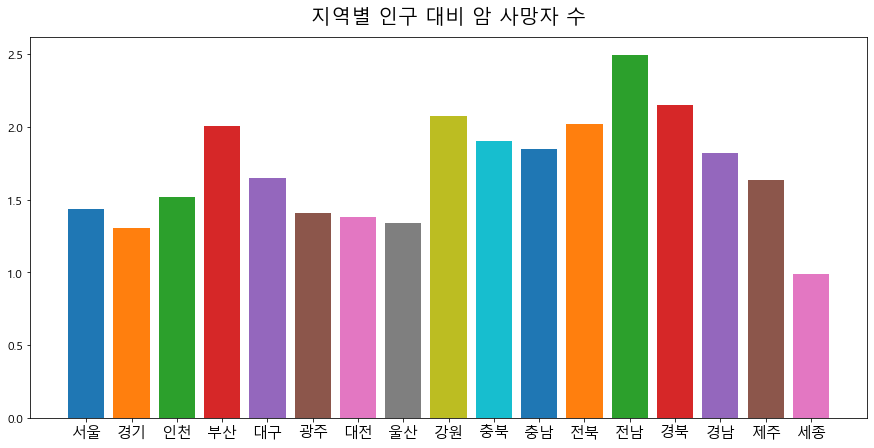

In [95]:
plt.figure(figsize = (15,7))
colors = sns.color_palette('tab10', len(df_merge.index))
plt.bar(df_merge.index, df_merge['인구 대비 암 사망자 수'], color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('지역별 인구 대비 암 사망자 수', fontsize = 20, pad = 15)
plt.show()

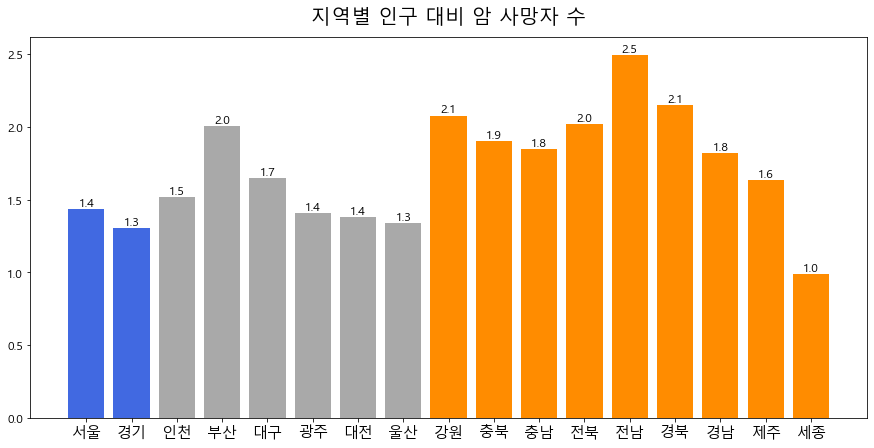

In [96]:
plt.figure(figsize = (15,7))

colors = []
for i in range(len(df_merge.index)):
    if i < 2:
        colors.append('royalblue')
    elif (i >= 2) & (i < 8):
        colors.append('darkgray')
    else:
        colors.append('darkorange')
        
bar = plt.bar(df_merge.index, df_merge['인구 대비 암 사망자 수'], color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('지역별 인구 대비 암 사망자 수', fontsize = 20, pad = 15)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha = 'center',
            va = 'bottom', size = 12)

plt.show()

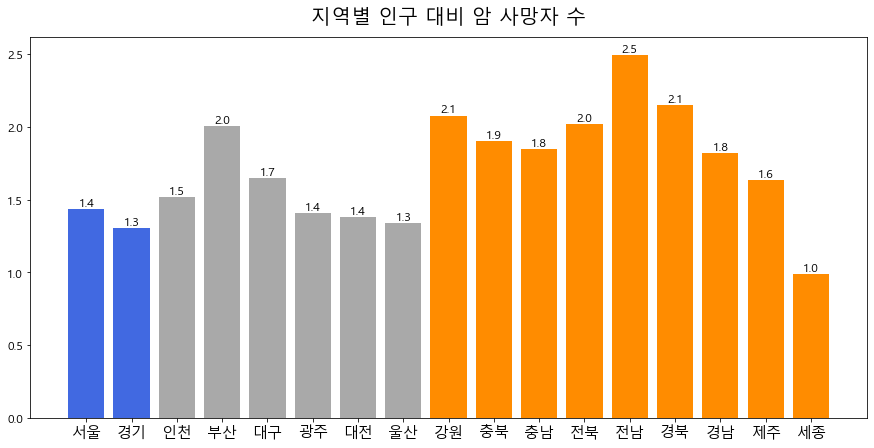

In [97]:
# 최종
plt.figure(figsize = (15,7))

colors = []
for i in df_merge.index:
    if i in ['서울', '경기']:
        colors.append('royalblue')
    elif i in ['인천', '부산', '대구', '광주', '대전', '울산']:
        colors.append('darkgray')
    else:
        colors.append('darkorange')
        
bar = plt.bar(df_merge.index, df_merge['인구 대비 암 사망자 수'], color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('지역별 인구 대비 암 사망자 수', fontsize = 20, pad = 15)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha = 'center',
            va = 'bottom', size = 12)

plt.show()

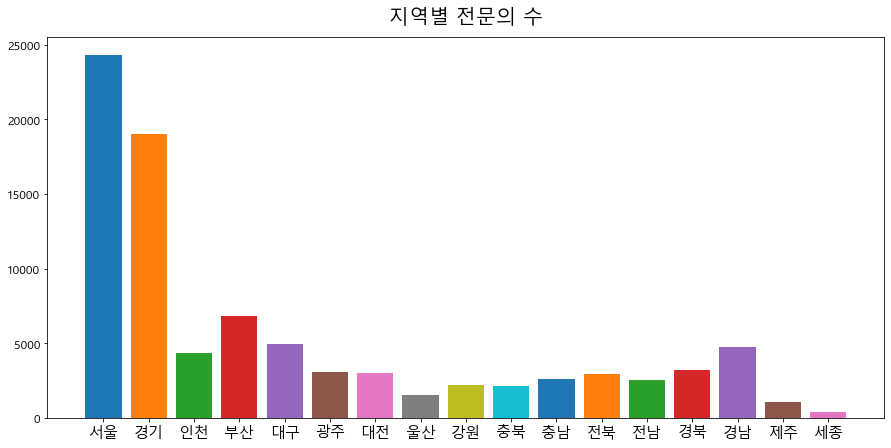

In [98]:
plt.figure(figsize = (15,7))
colors = sns.color_palette('tab10', len(df_merge.index))
plt.bar(df_merge.index, df_merge['전문의 수'], color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('지역별 전문의 수', fontsize = 20, pad = 15)
plt.show()

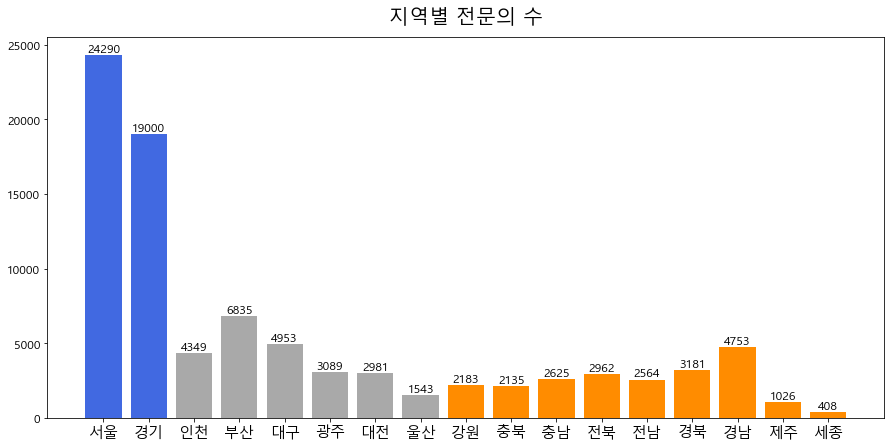

In [99]:
plt.figure(figsize = (15,7))

colors = []
for i in range(len(df_merge.index)):
    if i < 2:
        colors.append('royalblue')
    elif (i >= 2) & (i < 8):
        colors.append('darkgray')
    else:
        colors.append('darkorange')
        
bar = plt.bar(df_merge.index, df_merge['전문의 수'], color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('지역별 전문의 수', fontsize = 20, pad = 15)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha = 'center',
            va = 'bottom', size = 12)

plt.show()

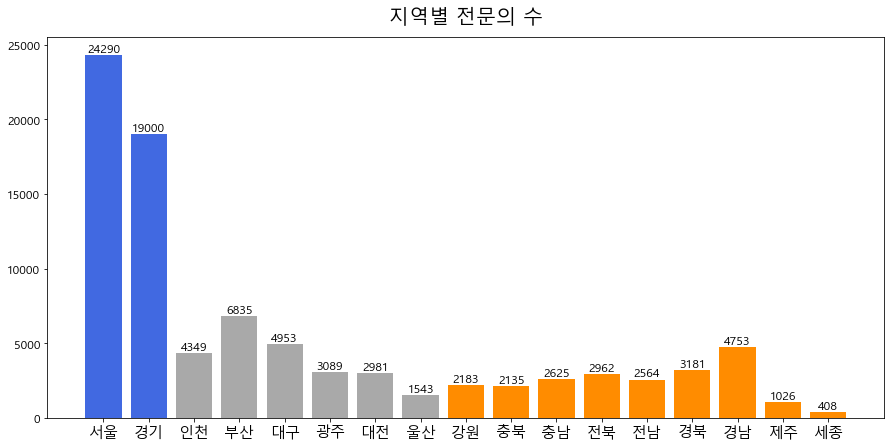

In [100]:
plt.figure(figsize = (15,7))

colors = []
for i in df_merge.index:
    if i in ['서울', '경기']:
        colors.append('royalblue')
    elif i in ['인천', '부산', '대구', '광주', '대전', '울산']:
        colors.append('darkgray')
    else:
        colors.append('darkorange')
        
bar = plt.bar(df_merge.index, df_merge['전문의 수'], color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('지역별 전문의 수', fontsize = 20, pad = 15)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha = 'center',
            va = 'bottom', size = 12)

plt.show()

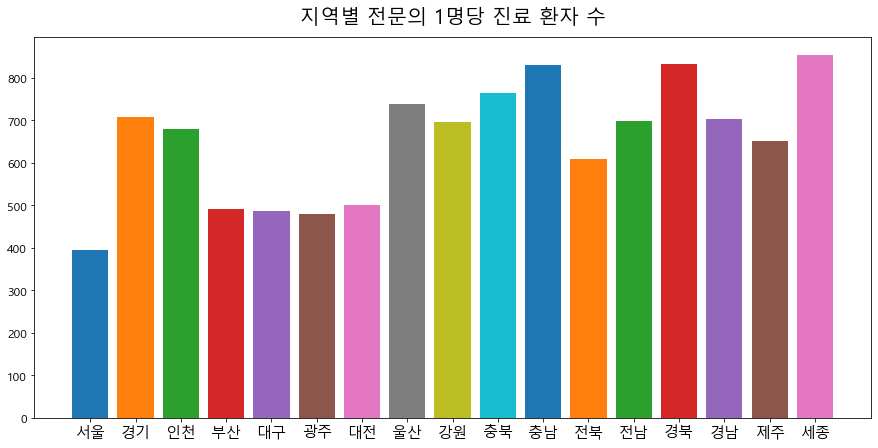

In [101]:
plt.figure(figsize = (15,7))
colors = sns.color_palette('tab10', len(df_merge.index))
plt.bar(df_merge.index, df_merge['전문의 1명당 진료 환자 수'], color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('지역별 전문의 1명당 진료 환자 수', fontsize = 20, pad = 15)
plt.show()

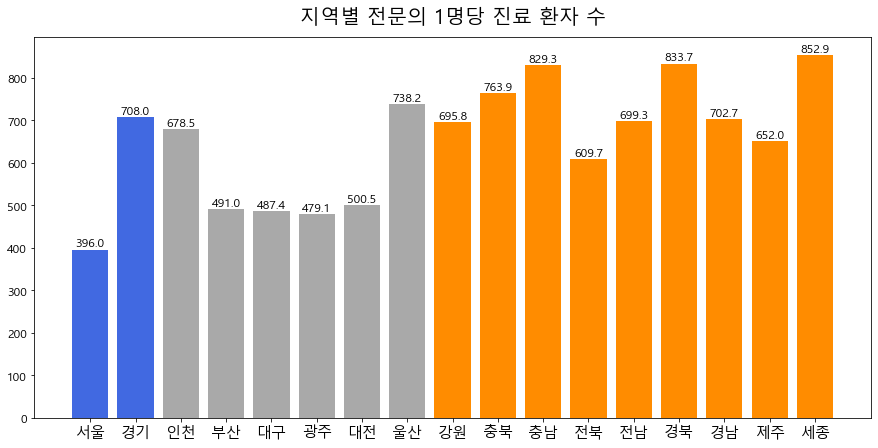

In [102]:
plt.figure(figsize = (15,7))

colors = []
for i in range(len(df_merge.index)):
    if i < 2:
        colors.append('royalblue')
    elif (i >= 2) & (i < 8):
        colors.append('darkgray')
    else:
        colors.append('darkorange')
        
bar = plt.bar(df_merge.index, df_merge['전문의 1명당 진료 환자 수'], color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('지역별 전문의 1명당 진료 환자 수', fontsize = 20, pad = 15)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha = 'center',
            va = 'bottom', size = 12)

plt.show()

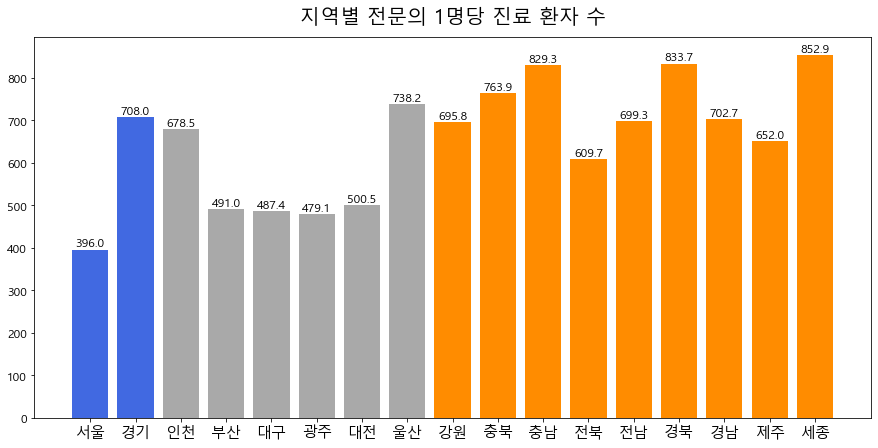

In [103]:
plt.figure(figsize = (15,7))

colors = []
for i in df_merge.index:
    if i in ['서울', '경기']:
        colors.append('royalblue')
    elif i in ['인천', '부산', '대구', '광주', '대전', '울산']:
        colors.append('darkgray')
    else:
        colors.append('darkorange')
        
bar = plt.bar(df_merge.index, df_merge['전문의 1명당 진료 환자 수'], color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('지역별 전문의 1명당 진료 환자 수', fontsize = 20, pad = 15)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha = 'center',
            va = 'bottom', size = 12)

plt.show()

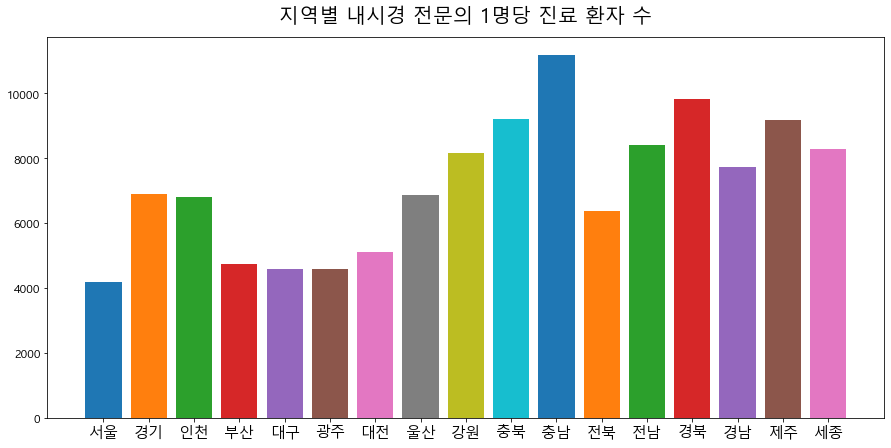

In [104]:
plt.figure(figsize = (15,7))
colors = sns.color_palette('tab10', len(df_merge.index))
plt.bar(df_merge.index, df_merge['내시경 전문의 1명당 진료 환자 수'], color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('지역별 내시경 전문의 1명당 진료 환자 수', fontsize = 20, pad = 15)
plt.show()

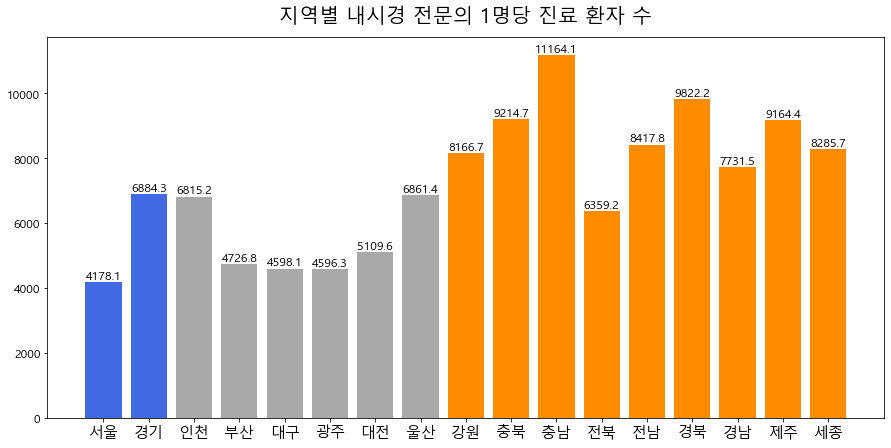

In [105]:
plt.figure(figsize = (15,7))

colors = []
for i in range(len(df_merge.index)):
    if i < 2:
        colors.append('royalblue')
    elif (i >= 2) & (i < 8):
        colors.append('darkgray')
    else:
        colors.append('darkorange')
        
bar = plt.bar(df_merge.index, df_merge['내시경 전문의 1명당 진료 환자 수'], color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('지역별 내시경 전문의 1명당 진료 환자 수', fontsize = 20, pad = 15)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha = 'center',
            va = 'bottom', size = 12)

plt.show()

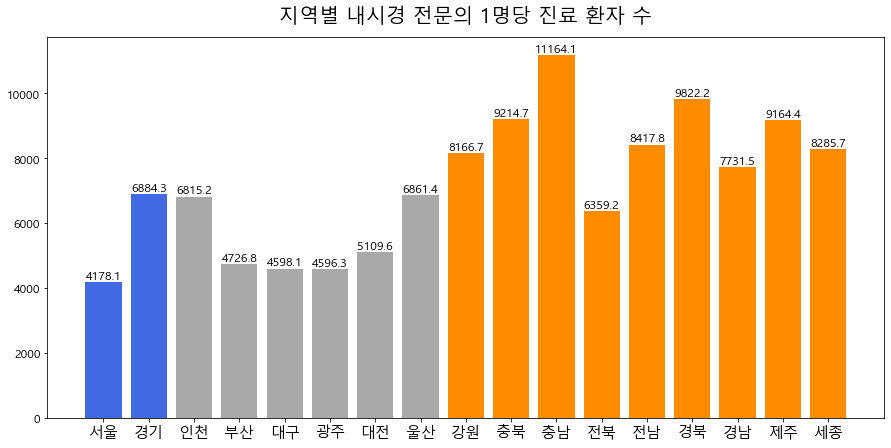

In [106]:
plt.figure(figsize = (15,7))

colors = []
for i in df_merge.index:
    if i in ['서울', '경기']:
        colors.append('royalblue')
    elif i in ['인천', '부산', '대구', '광주', '대전', '울산']:
        colors.append('darkgray')
    else:
        colors.append('darkorange')
        
bar = plt.bar(df_merge.index, df_merge['내시경 전문의 1명당 진료 환자 수'], color = colors)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('지역별 내시경 전문의 1명당 진료 환자 수', fontsize = 20, pad = 15)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha = 'center',
            va = 'bottom', size = 12)

plt.show()